# Sampling
It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population


## What is covered
#### basic principles of sampling
- the problems caused by selection bias
- what pseudo-random numbers are
#### how to perform the four most common methods of sampling: 
- simple random sampling, 
- systematic sampling, 
- stratified sampling, 
- and cluster sampling. 
#### sampling distribution
- sample size affects estimates of population parameters, 
- how to use repeated sampling to generate a sampling distribution, 
- the difference between approximate and exact sampling distributions, 
- central limit theorem. 
#### bootstrapping 
- estimate population parameters from a single sample, 
- what the standard error of a statistic 
- two ways to calculate confidence intervals.

In [1]:
# !pip install pyarrow
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/statistic/data/spotify_2000_2020.feather'
spotify = pd.read_feather(url)
spotify.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [3]:
# take a smaple of 1000 and compare mean song duration in the sample and in the whole population.
sample_1000 = spotify.sample(1000)
print(' mean in sample = ',sample_1000['duration_minutes'].mean(),'\n',
      'mean in population = ', spotify['duration_minutes'].mean())

 mean in sample =  3.834974949999998 
 mean in population =  3.8521519140899896


<AxesSubplot:>

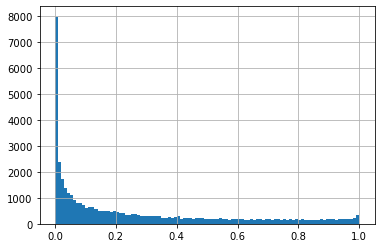

In [4]:
#conviniance sampling
# plot a  histogram to use acousticness of spotify with bins of width 0.01 from 0 to 1
import numpy as np
spotify['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

<AxesSubplot:>

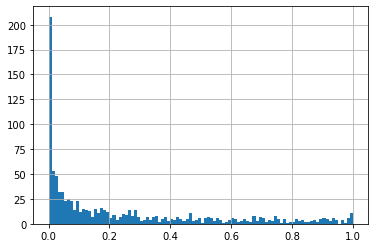

In [5]:
#Update the histogram code to use the sample_1000 dataset
sample_1000['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

<AxesSubplot:>

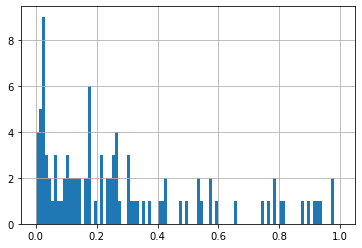

In [6]:
# sample last 100 first rows
sample_top_1000 = spotify.iloc[-100:]
sample_top_1000['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

### note
Almost same distribution which indicates that the sampling is random and can refect the whol population, but if we chose for instance last 100 first rows and plot the hist of it , it does not follow the same distribution as of the whole populatopn

### True random numbers
- Generated from physical processes, like ipping coins
- Hotbits uses radioactive decay
- RANDOM.ORG uses atmospheric noise
>True randomness is expensive
### Pseudo-random number generation
- Pseudo-random number generation is cheap and fast
- Next "random" number calculated from previous "random" number
- The rst "random" number calculated from a seed
- The same seed value yields the same random numbers

### Random number generating functions
>Prepend with numpy.random , such as numpy.random.beta()

|function| distribution| function| distribution|
|:--|:--|:--|:--|
|.beta|Beta|.hypergeometric| Hypergeometric|
|.binomial| Binomial| .lognormal| Lognormal|
|.chisquare| Chi-squared|.negative_binomial|Negative binomial|
|.exponential| Exponential|.normal|Normal|
|.f|F|.poisson|Poisson|
|.gamma|Gamma|.standard_t|t|
|.geometric|Geometric|.uniform|Uniform|

### Random numbers seeds
> we use seed to generate a same results and to be able tp reproduce the results  
ex:  
coffee_ratings.sample(n=5, random_state=19000113)  
np.random.seed(20000229)   
np.random.normal(loc=2, scale=1.5, size=2)

### Systematic sampling - defining the interval
>ex:  
coffee_ratings.iloc[::interval]
### Systematic sampling is only safe if we don't see a pattern in this scatter plot
- to make sytematic sampling safe we can shuffle the row at first
> ex:
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()

In [7]:
spotify.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [8]:
shuffled = spotify.sample(frac = 1)
shuffled.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
12276,0.3060,['Gerardo Coronel'],0.838,140236.0,2.337267,0.482,1.0,5ZyUe1pOBYblWLN2E3xJXu,0.000000,4.0,0.0959,-5.273,0.0,Te Deseo Lo Mejor,66.0,2017-04-28,0.0352,100.049,0.862,2017.0
28414,0.0113,['Atlas Genius'],0.721,217387.0,3.623117,0.822,0.0,0wDEiGfq4pw7FAkYKpkwMo,0.000070,7.0,0.0898,-4.843,1.0,Trojans,59.0,2013-02-18,0.0391,140.002,0.536,2013.0
23347,0.0168,['Red Hot Chili Peppers'],0.554,265507.0,4.425117,0.490,0.0,23NPGXlSaIqWzvxIRhM2oG,0.000534,4.0,0.1360,-8.046,1.0,Under the Bridge,63.0,2003-11-18,0.0457,84.275,0.513,2003.0
8070,0.0203,['Sir Sly'],0.764,226587.0,3.776450,0.661,0.0,0w4m3Xp4svlIoyL94Zjlyd,0.000179,5.0,0.1790,-8.276,1.0,&Run,59.0,2017-06-30,0.0526,92.018,0.479,2017.0
7371,0.7460,['The Black Keys'],0.436,311840.0,5.197333,0.288,0.0,3ghXwIS6cr3P5InauKlqFy,0.002080,7.0,0.0980,-10.726,1.0,These Days,45.0,2010-05-18,0.0315,117.482,0.268,2010.0


In [9]:
# rest the index 
shuffled.reset_index(drop = True, inplace = True)
shuffled.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.3060,['Gerardo Coronel'],0.838,140236.0,2.337267,0.482,1.0,5ZyUe1pOBYblWLN2E3xJXu,0.000000,4.0,0.0959,-5.273,0.0,Te Deseo Lo Mejor,66.0,2017-04-28,0.0352,100.049,0.862,2017.0
1,0.0113,['Atlas Genius'],0.721,217387.0,3.623117,0.822,0.0,0wDEiGfq4pw7FAkYKpkwMo,0.000070,7.0,0.0898,-4.843,1.0,Trojans,59.0,2013-02-18,0.0391,140.002,0.536,2013.0
2,0.0168,['Red Hot Chili Peppers'],0.554,265507.0,4.425117,0.490,0.0,23NPGXlSaIqWzvxIRhM2oG,0.000534,4.0,0.1360,-8.046,1.0,Under the Bridge,63.0,2003-11-18,0.0457,84.275,0.513,2003.0
3,0.0203,['Sir Sly'],0.764,226587.0,3.776450,0.661,0.0,0w4m3Xp4svlIoyL94Zjlyd,0.000179,5.0,0.1790,-8.276,1.0,&Run,59.0,2017-06-30,0.0526,92.018,0.479,2017.0
4,0.7460,['The Black Keys'],0.436,311840.0,5.197333,0.288,0.0,3ghXwIS6cr3P5InauKlqFy,0.002080,7.0,0.0980,-10.726,1.0,These Days,45.0,2010-05-18,0.0315,117.482,0.268,2010.0


In [10]:
# now that we shuffle the dataframe, we can slice it by an interval and it act as random sampling
# to sample every 2o rows
shuffled.iloc[::20].head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.30600,['Gerardo Coronel'],0.838,140236.0,2.337267,0.482,1.0,5ZyUe1pOBYblWLN2E3xJXu,0.000,4.0,0.0959,-5.273,0.0,Te Deseo Lo Mejor,66.0,2017-04-28,0.0352,100.049,0.862,2017.0
20,0.03050,"['Styles P', 'Pharoahe Monch']",0.427,189427.0,3.157117,0.706,1.0,4bEC9WAGg0ednUtNAlgZV4,0.000,0.0,0.3230,-6.533,1.0,The Life - Album Version Edit (Explicit),46.0,2002-01-01,0.3550,173.913,0.508,2002.0
40,0.00222,"['Austin Mahone', 'Flo Rida']",0.738,182526.0,3.042100,0.743,0.0,1qzrXebgUeRjCagXFNECHe,0.000,1.0,0.1340,-4.730,1.0,Say You're Just a Friend (feat. Flo Rida),55.0,2014,0.0574,99.975,0.711,2014.0
60,0.80600,['Grizzly Bear'],0.226,314413.0,5.240217,0.400,0.0,4BmtCb6sdMqECAItGmFDvU,0.747,11.0,0.1080,-10.256,1.0,Knife,47.0,2006-09-04,0.0298,88.673,0.101,2006.0
80,0.31300,['Mark Chesnutt'],0.500,163307.0,2.721783,0.865,0.0,1vFyOiwgezbBMIFtT4t0it,0.000,9.0,0.1100,-9.706,1.0,It's A Little Too Late,49.0,2001-01-01,0.0440,172.946,0.777,2001.0


### Stratified 
Stratified sampling is useful if you care about subgroups
#### Proportional stratified sampling
When we are interested in subgroups within the population, we should carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.
#### equal counts stratified sampling
If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique
### Weighted Sampling
we create a column of weights that adjust the relative probability of sampling each row.

In [11]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/statistic/data/late_shipments.feather'
shipments = pd.read_feather(url)
shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [12]:
"""Proportional stratified sampling"""
# make a sample of the shipment dataframe in a way that each shipment_mode has quarter of each shipment modes
portion_str_samp = shipments.groupby('shipment_mode').sample(frac = .25, random_state = 2022)
# make a simple randome sample of the shipment dataframe which has quarter of each shipment modes
simple_samp = shipments.sample(frac = .25, random_state = 2022)

In [13]:
# to comapre the preportion in each group of shipment mode in the portion_str_samp and the population 
star_por = portion_str_samp['shipment_mode'].value_counts(normalize = True)
simple_por = simple_samp['shipment_mode'].value_counts(normalize = True)
pop_por = shipments['shipment_mode'].value_counts(normalize = True)

print('the proportion in shipmen_mode column of stratified sample is :', '\n',star_por)
print('the proportion in shipmen_mode column of simple random sample of shipment dataframe is :','\n', simple_por)
print('the proportion in shipmen_mode column of shipments dataframe is :', '\n',pop_por)

the proportion in shipmen_mode column of stratified sample is : 
 Air            0.904
Ocean          0.088
Air Charter    0.008
Name: shipment_mode, dtype: float64
the proportion in shipmen_mode column of simple random sample of shipment dataframe is : 
 Air            0.900
Ocean          0.088
Air Charter    0.012
Name: shipment_mode, dtype: float64
the proportion in shipmen_mode column of shipments dataframe is : 
 Air            0.906
Ocean          0.088
Air Charter    0.006
Name: shipment_mode, dtype: float64


In [14]:
"""equal counts stratified sampling"""
# make a sample of the shipment dataframe in a way that each shipment_mode has 5 sample from each mode 
"""take into consideration that the sample size in this case should not exceed any of the mode's counts"""
# unique_modes = list(shipments['shipment_mode'].unique())
# sample_size = int((.25*len(shipments))//len(unique_modes))
equal_str_samp = shipments.groupby('shipment_mode').sample(5, random_state = 2022)

In [15]:
equal_str_samp['shipment_mode'].value_counts(normalize = True)

Air            0.333333
Air Charter    0.333333
Ocean          0.333333
Name: shipment_mode, dtype: float64

In [16]:
"""Weighted random sampling"""
# we want to emphasis on Ocean shipment, so we weight it 2 in comparision to other two modes
condition = shipments['shipment_mode']=='Ocean'
shipments['weight'] = np.where(condition,2,1)
weight_sample= shipments.sample(frac = .2, weights = 'weight')

In [17]:
weight_sample['shipment_mode'].value_counts(normalize = True)

Air            0.830
Ocean          0.165
Air Charter    0.005
Name: shipment_mode, dtype: float64

### Cluster sampling:
is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.
### Stratified sampling vs. cluster sampling
|<b>Stratified sampling </b>|<b>Cluster sampling </b> |
|:-|:-|
|Split the population into subgroups|Use simple random sampling to pick some subgroups|  
|Use simple random sampling on every subgroup|Use simple random sampling on only those subgroups|   

  
 

In [18]:
# change type of country column to 'category'
shipments['country'] = shipments['country'].astype('category')

In [19]:
import random
# Create a list of unique country  from shipments, and assign to country_col.
country_col = list(shipments['country'].unique())
#Randomly sample four country_sample values from country_col.
country_sample = random.sample(country_col,k =2 )

In [20]:
# ubset shipment for the sampled country  by filtering for rows where country is in country_sample
condition = shipments['country'].isin(country_sample)
filtered_ships = shipments[condition]
filtered_ships['country'] = filtered_ships['country'].cat.remove_unused_categories()

In [21]:
# just check to see the counts for each country in the sample to then define a valid sample number
count_sample_country = filtered_ships.groupby('country').country.count()
n_sample = count_sample_country.min()

In [22]:
# Randomly sample 10 shipment from each country
country_cluster = filtered_ships.groupby('country').sample(n= n_sample, random_state = 2022)


# Print the sample
country_cluster.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd,weight
111,10085.0,Ethiopia,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,251775.0,27.0,1.35,Chembio Diagnostics Sys. Inc.,Yes,3061.0,15288.75,expensive,493.48,1
938,64864.0,Ethiopia,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,11700.0,32.5,1.62,Chembio Diagnostics Sys. Inc.,Yes,112.0,1414.69,reasonable,13.77,1
66,55504.0,Ethiopia,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,864.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,490.23,reasonable,1.21,1
407,1973.0,Ethiopia,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,107514.0,27.0,1.35,Chembio Diagnostics Sys. Inc.,Yes,1445.0,7303.25,expensive,210.73,1
652,42980.0,Ethiopia,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,22638.0,24.5,24.50,"KHB Test Kit Facility, Shanghai China",Yes,656.0,6488.44,expensive,31.74,1


#### Relative errors: 
Absolute difference between the population and a sample mean divided by the population mean is relative error. 
larger sample sizes will give us more accurate resultsand relative error decreases as the sample size increases. If our sample size is small, the sample mean we calculate can be wildly different by adding one or two more random rows to the sample and adding just a few more samples can give us much better accuracy. Further to the right of the plot, the line is less steep. If we already have a large sample size, adding a few more rows to the sample doesn't bring as much benefit.

In [23]:
# calculate relative error for pack_price in the shipments dataframe for differnt sample sizes and plot it against the sample size
errors = []
mean_pop = shipments['pack_price'].mean()
for n in range(5,300, 5):
    mean_sample = shipments.sample(n, random_state = 2022)['pack_price'].mean()
    s_error = np.abs(mean_pop-mean_sample)*(100/mean_pop)
    errors.append(s_error)

Text(0, 0.5, 'relative error')

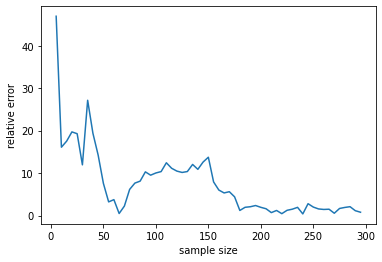

In [24]:
plt.plot(list(range(5,300,5)),errors )
plt.xlabel('sample size')
plt.ylabel('relative error')

In [25]:
# Distribution of sample means for sample size 30
""" plot histogram of the sample mean distribution for times repeat"""
def hist_mean_distri(population, sample_size, column, times):
    means = []
    for r in range(times):
        sample_mean = population.sample(n = sample_size)[column].mean()
        means.append(sample_mean)
    p = plt.hist(means, bins = sample_size)
    plt.xlabel('Sample_mean')
    plt.show()

- We aim to check smaple mean for several replicates for sample size of 30 


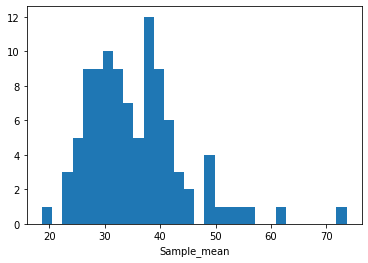

In [26]:
# repeat sampling for example 100 times to see the distribution of sample mean for pack_price of shipments dataframe
hist_mean_distri(shipments, 30, 'pack_price', 100)

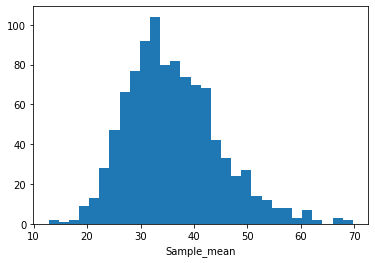

In [27]:
# lets repeat for 1000
hist_mean_distri(shipments, 30, 'pack_price', 1000)

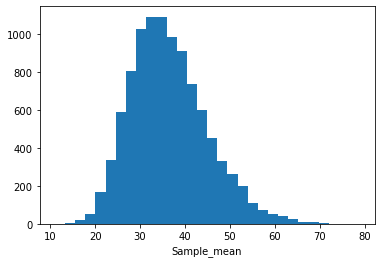

In [28]:
# lets repeat for 10000
hist_mean_distri(shipments, 30, 'pack_price', 10000)
# they roughly follow a bell-shaped curve, like a normal distribution.

### sampling distribution.
 A distribution of replicates of sample means, or other point estimates, is known as a sampling distribution 

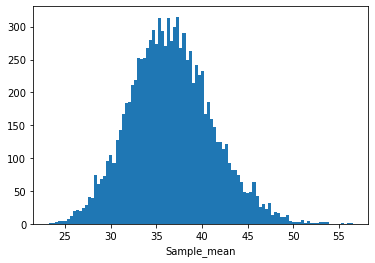

In [29]:
# lets check sampling distribution for  sample size of 100 for 10000 replica
hist_mean_distri(shipments, 100, 'pack_price', 10000)
#increasing the sample size to one hundred results in a much narrower range

### Approximate sampling distributions
Long before you start dealing with big datasets, it becomes computationally impossible to calculate the exact sampling distribution. That means we need to rely on approximations.

In [30]:
# generate all possible combinations of rolls using the expand_grid function
#product('ABCD', repeat=2) >> AA AB AC AD BA BB BC BD CA CB CC CD DA DB DC DD
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [31]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid({'die1': [1, 2, 3, 4, 5, 6,7,8],'die2': [1, 2, 3, 4, 5, 6,7,8],
'die3': [1, 2, 3, 4, 5, 6,7,8],'die4': [1, 2, 3, 4, 5, 6,7,8], 'die5': [1, 2, 3, 4, 5, 6,7,8]})
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = dice.mean(axis = 1)
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


<AxesSubplot:>

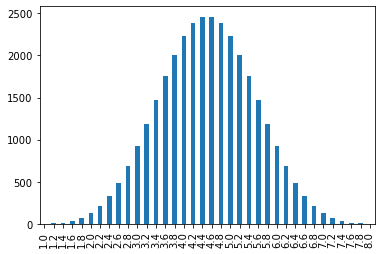

In [32]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort = False).plot(kind = 'bar')

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.
In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [33]:
#Sample one to eight, five times, with replacement. Assign to five_rolls.
sample = np.random.choice(range(1,9), 5)
print(sample)
# Calculate the mean of five_rolls
np.mean(sample)

[6 3 7 7 1]


4.8

In [34]:
# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000
means =[]
for r in range(1000):
    sample = np.random.choice(range(1,9), 5)
    means.append(np.mean(sample))
print(means[:10])

[5.4, 4.6, 4.6, 3.6, 3.0, 4.8, 4.6, 5.4, 2.8, 5.0]


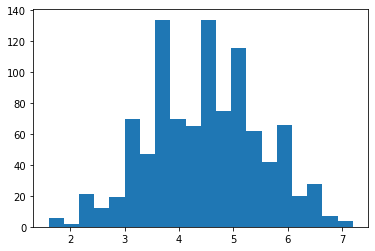

In [35]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(means, bins = 20)
plt.show()

### note
Here's a histogram of the approximate sampling distribution of mean rolls. This time, it uses the simulated rather than the exact values. It's known as an approximate sampling distribution. Notice that although it isn't perfect, it's pretty close to the exact sampling distribution

### central limit theorem
The means of independent samples have normal distributions. 
##### as the sample size increases, we see two things:
- The distribution of these averages gets closer to being normal
- the width of this sampling distribution gets narrower.

### summary statistics on our sampling distributions 
- <b>mean</b> of sampling distributions is almost equal to of  the sample means
- <b>standard deviation</b> of sampling distributions is smaller than std of  the sample, and they decrease as the sample size increases.divide the population standard deviation, in this case around 2-point-7, by the square root of the sample size, we get an estimate of the standard deviation of the sampling distribution for that sample size. 
### standard error
This standard deviation of the sampling distribution has a special name: the standard error.

### Principles of bootstrapping
Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.
#### The bootstrapping process has three steps:
- First, randomly sample with replacement to get a resample the same size as the original dataset.(resampling) 
- Then, calculate a statistic, such as a mean of one of the columns. Note that the mean isn't always the choice here and bootstrapping allows for complex statistics to be computed, too. 
- Then, replicate this many times to get lots of these bootstrap statistics.


In [36]:
# make a smaple of spotify is a subset of the spotify_population dataset and creat a row index column called 'index', keep only  the artist name, song name, and danceability columns 
spotify.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [58]:
spotify_cols = spotify.loc[:,['name','artists', 'danceability', 'popularity']]
spotify_cols.reset_index(inplace = True)
spotify_sample = spotify_cols.sample(5000, random_state = 2020)

In [59]:
spotify_sample.head()

,index,name,artists,danceability,popularity
2152,2152,La sitiera,['Omara Portuondo'],0.618,52.0
7125,7125,Top Yourself,['The Raconteurs'],0.505,43.0
16293,16293,22 (OVER S∞∞N),['Bon Iver'],0.298,57.0
28515,28515,Deira City Centre,['Night Lovell'],0.677,67.0
27886,27886,There Will Be A Day,['Jeremy Camp'],0.345,54.0


In [60]:
## Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac = 1, replace = True)

In [61]:
# Calculate the mean of the danceability
mean_danceability = np.mean(spotify_1_resample['danceability'])
mean_danceability

0.5909621

In [62]:
#Replicate this 1000 times
mean_1000 = []
for r in range(1000):
    ## Generate 1 bootstrap resample
    spotify_1_resample = spotify_sample.sample(frac = 1, replace = True)
    # Calculate the mean of the danceability
    mean_danceability = np.mean(spotify_1_resample['danceability'])
    mean_1000.append(mean_danceability)  

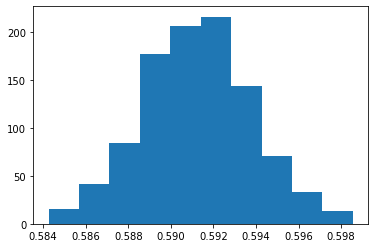

In [63]:
p = plt.hist(mean_1000)

### Q 
comapre the sampling distribution, bootstrap sampling, and population's means and strandard
> Calculate the mean popularity in 4 ways:
Population: from spotify_population, take the mean of popularity.
Sample: from spotify_sample, take the mean of popularity.
Sampling distribution: from sampling_distribution, take its mean.
Bootstrap distribution: from bootstrap_distribution, take its mean.

In [70]:
#Generate a sampling distribution of 2000 replicates.
#Sample 500 rows of the population without replacement and calculate the mean popularity
mean_sample_2000 = []
for r in range(2000):
    ## Generate 1 sample of 500
    spotify_sample_1= spotify.sample(5000)
    # Calculate the mean of the danceability
    mean_popularity = np.mean(spotify_sample_1['popularity'])
    mean_sample_2000.append(mean_popularity)  

In [71]:
mean_sample_2000[:4]

[54.6402, 54.738, 55.0764, 54.6104]

In [72]:
#Generate a bootstrap distribution of 2000 replicates.
#Sample 500 rows of the sample with replacement and calculate the mean popularity.
mean_resample_2000 = []
for r in range(2000):
    ## Generate 1 bootstrap resample
    spotify_1_resample = spotify_sample.sample(frac = 1, replace = True)
    # Calculate the mean of the danceability
    mean_popularity = np.mean(spotify_1_resample['popularity'])
    mean_resample_2000.append(mean_popularity)  

In [73]:
mean_resample_2000[:4]

[54.7172, 54.7874, 55.0306, 55.038]

In [74]:
# Calculate the population mean popularity
pop_mean = spotify['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling distribution estimate of mean popularity
samp_distn_mean = np.mean(mean_sample_2000)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_resample_2000)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.903, 54.839241799999996, 54.8999613]


### notes:
- The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.
- The bootstrap distribution mean is usually almost identical to the original sample mean. However, that is not often a good thing. If the original sample wasn't closely representative of the population, then the bootstrap distribution mean won't be a good estimate of the population mean. 

### Q.
>Calculate the standard deviation of popularity in 4 ways.  
Population: from spotify_population, take the standard deviation of popularity.  
Original sample: from spotify_sample, take the standard deviation of popularity.  
Sampling distribution: from sampling_distribution, take its standard deviation and multiply by the square root of the sample size (5000).  
Bootstrap distribution: from bootstrap_distribution, take its standard deviation and multiply by the square root of the sample size.  

In [75]:
# Calculate the population mean popularity
pop_std = spotify['popularity'].std(ddof = 0)

# Calculate the original sample mean popularity
samp_std = spotify_sample['popularity'].std(ddof = 1)

# Calculate the sampling distribution estimate of mean popularity
samp_distn_std = np.std(mean_sample_2000, ddof = 1)*np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_std = np.std(mean_resample_2000, ddof = 1)*np.sqrt(5000)

# Print the means
print([pop_std, samp_std, samp_distn_std, boot_distn_std])

[10.880065274257204, 10.817420871855889, 10.229434369874209, 11.011115835714547]


- If we multiply that standard error by the square root of the sample size, we get an estimate of the standard deviation in the original population.

### Confidance interval
Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.
#### Mean plus or minus one standard deviation
If we create a confidence interval by adding and subtracting one standard deviation from the mean, we see that there are lots of values in the bootstrap distribution outside of this one standard deviation confidence interval.
#### Quantile method for confidence intervals
If we want to include ninety-five percent of the values in the confidence interval, we can use quantiles. To get the middle ninety-five percent of values, we go from the point-zero-two-five quantile to the point-nine-seven-five quantile since the difference between those two numbers is point-nine-five. To calculate the lower and upper bounds for this confidence interval, we call quantile from NumPy, passing the distribution values and the quantile values to use. 
#### or
as inverse of cdf is ppf , from scipy.stats we can call norm.ppf on (quantile, mean, standard_error= std of the boorstrap distribution) of the bootstrap distribution  
<code>from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print((lower, upper))</code>

### Q.
- Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant
- Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
- Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation of bootstrap_distribution.
- Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation standard_error.
- Calculate upper_se as the 0.975 quantile of that same inv. CDF

In [77]:
bootstrap_distribution = mean_resample_2000

In [78]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.600795, 55.19941)


In [79]:
# Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
mean_dist_strap = np.mean(bootstrap_distribution)
std_dist_strap = np.std(bootstrap_distribution, ddof = 1) # the amount named standard error

In [85]:
from scipy.stats import norm 
lower_quant = norm.ppf(.025, mean_dist_strap, std_dist_strap)
upper_quant = norm.ppf(.975, mean_dist_strap, std_dist_strap)
print((lower_quant, upper_quant))

(54.59475434905852, 55.20516825094148)
